In [10]:
#from pip._internal import main
#main(["install","matplotlib"])

#competitions_df.loc[competitions_df['last_name'] == 'Клюй']


In [3]:
# Импорт библиотек
import numpy
import pandas as pd

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [5]:
# Задаем рабочую папку
import os
#os.getcwd()
os.chdir("Data Analysis/content/sample_data")

In [6]:
# Импорт данных
competitions_df = pd.read_csv('stg_Competitions_etl_results.csv', sep=',', parse_dates=[ 'date'])

# 'result' - тип time 

In [13]:
#  Знакомимся с данными
competitions_df.dtypes


place                        int64
last_name                   object
first_name                  object
birth_year                   int64
city                        object
team                        object
country                     object
result                      object
disc                        object
points                     float64
athlete_group               object
distance                     int64
style                       object
date                datetime64[ns]
pool_city                   object
pool_description            object
id                           int64
dtype: object

In [8]:
#  Знакомимся с данными
competitions_df.head()
#competitions_df.tail()
#competitions_df.shape

,place,last_name,first_name,birth_year,city,team,country,result,disc,points,athlete_group,distance,style,date,pool_city,pool_description,id
0,1,Евмененко,София,2007,Долгопрудный,ДЮСШ,RUS,00:00:33.50,NaN,387.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,8
1,2,Редюк,Алина,2007,Гомель-1,ГОЦОР ввс,BLR,00:00:35.44,NaN,327.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,9
2,3,Козловская,Кристина,2007,Минск,Волна,BLR,00:00:36.10,NaN,309.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,10
3,4,Карпочева,Екатерина,2007,Речица,Олимп,BLR,00:00:36.62,NaN,296.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,11
4,5,Гисак,Анна,2007,Могилев,СДЮШОР,BLR,00:00:36.96,NaN,288.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,12


**Первые наблюдения**

1. строковое значение в поле pool_description плохо подходит для обработки данных

2. несмотря на то, что значения в result выглядят корректно - это тоже строки (расчеты затруднены)

3. Информацию о поле спортсмена сложно определить (надо парсить athlet_group)

In [17]:
# посмотрим какие значения находятся в поле pool_description

competitions_df['pool_description'].unique()

**pool_size**

In [5]:
# для удобства последующей работы добавим новое поле pool_size (калькулируемое, на базе pool_description)

competitions_df['pool_size'] = 'NaN'
competitions_df.loc[competitions_df['pool_description'] == 'бассейн 50м.', 'pool_size'] = 50
competitions_df.head(3)

,place,last_name,first_name,birth_year,city,team,country,result,disc,points,athlete_group,distance,style,date,pool_city,pool_description,id,pool_size
0,1,Евмененко,София,2007,Долгопрудный,ДЮСШ,RUS,00:00:33.50,NaN,387.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,8,50
1,2,Редюк,Алина,2007,Гомель-1,ГОЦОР ввс,BLR,00:00:35.44,NaN,327.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,9,50
2,3,Козловская,Кристина,2007,Минск,Волна,BLR,00:00:36.10,NaN,309.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,10,50


**result_s**

In [6]:
# создаем поле для хранения результата в секундах

competitions_df['result_s'] = 'NaN'

In [7]:
# делаем конвертацию из строки в секунды

for ix in range(len(competitions_df)):
  result = str(competitions_df.loc[ix, 'result'])
  if result == 'nan': 
    continue
    
  hh, mm, ss = map(float, result.split(':'))
  result_s = hh*3600+mm*60+ss
  competitions_df.loc[ix, 'result_s'] = result_s

competitions_df.tail(3)

,place,last_name,first_name,birth_year,city,team,country,result,disc,points,athlete_group,distance,style,date,pool_city,pool_description,id,pool_size,result_s
1367,63,Терешкин,Егор,2005,Гомель-2,ГОЦОР ввс,BLR,00:03:10.56,NaN,214.0,Юноши 2004-2005г.р.,200,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1462,50,190.56
1368,64,Бурлаков,Андрей,2005,Гомель,СДЮШОР 7,BLR,00:03:14.46,NaN,201.0,Юноши 2004-2005г.р.,200,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1463,50,194.46
1369,65,Калугин,Георгий,2004,Долгопрудный,ДЮСШ,RUS,NaN,DSQ,NaN,Юноши 2004-2005г.р.,200,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1464,50,NaN


**gender**

In [8]:
# перечень групп, на основании которых можно определить пол спортсмена

competitions_df['athlete_group'].unique()

array(['Девочки 2007г.р. и моложе', 'Мальчики 2007г.р. и моложе',
       'Девочки 2006 г.р.', 'Мальчики 2006 г.р.',
       'Девушки 2004-2005 г.р.', 'Юноши 2004-2005 г.р.',
       'Девочки 2006г.р.', 'Мальчики 2006г.р.', 'Юноши 2004',
       'Девушки 2004-2005 г.р', 'Девушки 2004-2005г.р.',
       'Юноши 2004-2005г.р.'], dtype=object)

In [9]:
# размечаем данные (пол спортсмена по его группе)

group_gender_dict = dict(zip(list(competitions_df['athlete_group'].unique()), ['Д', 'М', 'Д', 'М', 'Д', 'М', 'Д', 'М', 'М', 'Д', 'Д', 'М']))

print(group_gender_dict)

{'Девочки 2007г.р. и моложе': 'Д', 'Мальчики 2007г.р. и моложе': 'М', 'Девочки 2006 г.р.': 'Д', 'Мальчики 2006 г.р.': 'М', 'Девушки 2004-2005 г.р.': 'Д', 'Юноши 2004-2005 г.р.': 'М', 'Девочки 2006г.р.': 'Д', 'Мальчики 2006г.р.': 'М', 'Юноши 2004': 'М', 'Девушки 2004-2005 г.р': 'Д', 'Девушки 2004-2005г.р.': 'Д', 'Юноши 2004-2005г.р.': 'М'}


In [10]:
# создаем поле gender

competitions_df['gender'] = 'NaN'

In [11]:
# вычленяем пол

for group, gender in group_gender_dict.items():
   competitions_df.loc[competitions_df['athlete_group'] == group, 'gender'] = gender

# смотрим на 10 случайных записей
competitions_df.sample(10)

,place,last_name,first_name,birth_year,city,team,country,result,disc,points,athlete_group,distance,style,date,pool_city,pool_description,id,pool_size,result_s,gender
921,27,Парис,NaN,2007,Речица,СДЮШОР,BLR,00:00:42.97,NaN,249.0,Девочки 2007г.р. и моложе,50,на спине,2019-04-23,г.Жлобин,бассейн 50м.,993,50,42.97,Д
1133,45,Синькевич,Валдислав,2007,Гомель-2,ГОЦОР ввс,BLR,00:01:29.46,NaN,177.0,Мальчики 2007г.р. и моложе,100,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1214,50,89.46,М
168,29,Горбачева,Полина,2006,Гомель,СДЮШОР 7,BLR,00:01:34.64,NaN,231.0,Девочки 2006 г.р.,100,на спине,2019-04-22,г.Жлобин,бассейн 50м.,180,50,94.64,Д
377,1,Якимчук,Арсений,2007,Могилев,СДЮШОР,BLR,00:00:28.46,NaN,396.0,Мальчики 2007г.р. и моложе,50,вольный стиль,2019-04-22,г.Жлобин,бассейн 50м.,402,50,28.46,М
964,18,Терещенко,Евгений,2007,Гомель-2,ГОЦОР ввс,BLR,00:00:38.78,NaN,238.0,Мальчики 2007г.р. и моложе,50,на спине,2019-04-23,г.Жлобин,бассейн 50м.,1037,50,38.78,М
1358,54,Балахонов,Вячеслав,2004,Гомель,Гомсельмаш,BLR,00:02:52.57,NaN,288.0,Юноши 2004-2005г.р.,200,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1453,50,172.57,М
1163,75,Яцкевич,Кирилл,2009,Бобруйск,СДЮШОР,BLR,00:01:34.96,NaN,148.0,Мальчики 2007г.р. и моложе,100,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1244,50,94.96,М
1132,44,Журавков,Иван,2008,Речица,Олимп,BLR,00:01:29.20,NaN,179.0,Мальчики 2007г.р. и моложе,100,комплексное плавание,2019-04-23,г.Жлобин,бассейн 50м.,1213,50,89.2,М
569,5,Марьевская,Виктория,2007,Гомель,Гомсельмаш,BLR,00:00:44.92,NaN,280.0,Девочки 2007г.р. и моложе,50,брасс,2019-04-23,г.Жлобин,бассейн 50м.,604,50,44.92,Д
786,48,Марченко,Руслан,2006,Гомель,ДЮСШ-6,BLR,00:01:44.81,NaN,161.0,Мальчики 2006 г.р.,100,брасс,2019-04-23,г.Жлобин,бассейн 50м.,831,50,104.81,М


**Ищем изъяны в данных**

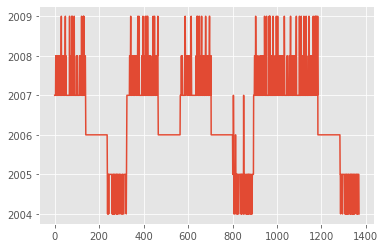

In [12]:
#  График наводит на мысль о некорректности данных
competitions_df.loc[:,'birth_year'].plot()


In [26]:
# посмотрим на данные. строки [804, 805] и [813, 814] могут быть как выбросами, так и ошибочными данными
# согласно проведенной инвестигации все эти строчки - выбросы. данные в них корректны

competitions_df.loc[800:830,:]

In [27]:
#со списком соревнований тоже не все хорошо (Юноши 2004-2005, 100 баттерфляй)
#возможно, есть и другие проблемы с данными

competitions_df[['distance', 'style', 'athlete_group']].drop_duplicates()

**Исправим ошибки**

In [28]:
# "поплывшие атрибуты". Проблемные записи:

competitions_df[competitions_df['athlete_group'] == 'Юноши 2004'].head()

In [22]:
competitions_df.loc[competitions_df['athlete_group'] == 'Юноши 2004', 'distance'] = 100
competitions_df.loc[competitions_df['athlete_group'] == 'Юноши 2004', 'style'] = 'баттерфляй'
competitions_df.loc[competitions_df['athlete_group'] == 'Юноши 2004', 'athlete_group'] = 'Юноши 2004-2005 г.р.'

#перепроверим список соревнований
#competitions_df[['distance', 'style', 'athlete_group']].drop_duplicates()


In [23]:
#посмотрим на число участников соревнований

competitions_df.groupby(['distance', 'style', 'athlete_group']).size()

distance  style                 athlete_group             
50        баттерфляй            Девочки 2007г.р. и моложе     52
                                Мальчики 2007г.р. и моложе    88
          брасс                 Девочки 2007г.р. и моложе     51
                                Мальчики 2007г.р. и моложе    88
          вольный стиль         Девочки 2007г.р. и моложе     52
                                Мальчики 2007г.р. и моложе    89
          на спине              Девочки 2007г.р. и моложе     52
                                Мальчики 2007г.р. и моложе    89
100       баттерфляй            Девушки 2004-2005 г.р.         5
                                Юноши 2004-2005 г.р.           9
          брасс                 Девочки 2006 г.р.             35
                                Девушки 2004-2005 г.р          5
                                Мальчики 2006 г.р.            62
                                Юноши 2004-2005 г.р.          14
          вольный стиль        

**Отмечаем странности в данных выше**

Несколько раз на стометровках видим "Девушки 2004-2005 г.р.         5"

В случае вольного стиля 100м        "Девушки 2004-2005 г.р.        44"

---



Юноши 2004-2005 г.р. есть на всех стометровках кроме вольного стиля


In [24]:
competitions_df[
     (competitions_df['athlete_group'] == 'Девушки 2004-2005 г.р.') & \
     (competitions_df['distance'] == 100) & \
     (competitions_df['style'] == 'вольный стиль')
][['place','first_name','last_name','birth_year','athlete_group']]

,place,first_name,last_name,birth_year,athlete_group
851,1,Ксения,Наумова,2005,Девушки 2004-2005 г.р.
852,2,Марина,Горовая,2004,Девушки 2004-2005 г.р.
853,3,Дарья,Парванова,2004,Девушки 2004-2005 г.р.
854,4,Ксения,Котягова,2005,Девушки 2004-2005 г.р.
855,5,Кристина,Хлистунова,2005,Девушки 2004-2005 г.р.
856,6,Инна,Болдырева,2005,Девушки 2004-2005 г.р.
857,7,Диана,Андрусевич,2005,Девушки 2004-2005 г.р.
858,8,Анастасия,Подвязнова,2005,Девушки 2004-2005 г.р.
859,1,Никита,Дедушкевич,2004,Девушки 2004-2005 г.р.
860,2,Илья,Мамонтов,2004,Девушки 2004-2005 г.р.


In [25]:
#мальчики попали в "девичью" группу. скорее всего, они есть и в мужской группе
#поищем "дубликаты", т.е. тех, кто попал в несколько групп сразу 

groups_df = competitions_df.groupby(['first_name', 'last_name'])['athlete_group']
groups_df.unique()

#данные нуждаются в очистке

first_name  last_name  
Александр   Алексеев                 [Мальчики 2006 г.р., Мальчики 2006г.р.]
            Бальков                                 [Девушки 2004-2005 г.р.]
            Бугдусевич                          [Мальчики 2007г.р. и моложе]
            Ковалев              [Юноши 2004-2005 г.р., Юноши 2004-2005г.р.]
            Ракомский      [Юноши 2004-2005 г.р., Девушки 2004-2005 г.р.,...
            Раманюга                 [Мальчики 2006 г.р., Мальчики 2006г.р.]
            Чичкан                   [Мальчики 2006 г.р., Мальчики 2006г.р.]
Александра  Горбач                     [Девочки 2006 г.р., Девочки 2006г.р.]
            Козлова                              [Девочки 2007г.р. и моложе]
            Матвеенко                  [Девочки 2006 г.р., Девочки 2006г.р.]
            Яцук                                 [Девочки 2007г.р. и моложе]
Алексей     Киринский                           [Мальчики 2007г.р. и моложе]
            Лашкевич                 [Мальчики 2006 

**Часто повторяющиеся "разночтения"  в названиях групп:**

'Мальчики 2006 г.р.' 'Мальчики 2006г.р.'

'Юноши 2004-2005 г.р.' 'Юноши 2004-2005г.р.'

'Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.' 'Юноши 2004-2005г.р.'

'Девочки 2006 г.р.' 'Девочки 2006г.р.'

'Девушки 2004-2005 г.р.' 'Девушки 2004-2005 г.р' 'Девушки 2004-2005г.р.'

In [26]:
# наводим порядок:
def clean_column_data(column, old_value, new_value, filter=True):
  competitions_df.loc[filter & (competitions_df[column] == old_value), column] = new_value
  
clean_column_data('athlete_group', 'Мальчики 2006г.р.', 'Мальчики 2006 г.р.')
clean_column_data('athlete_group', 'Юноши 2004-2005г.р.', 'Юноши 2004-2005 г.р.')
clean_column_data('athlete_group', 'Девочки 2006г.р.', 'Девочки 2006 г.р.')
clean_column_data('athlete_group', 'Девушки 2004-2005 г.р', 'Девушки 2004-2005 г.р.')
clean_column_data('athlete_group', 'Девушки 2004-2005г.р.', 'Девушки 2004-2005 г.р.')

#перепроверим список групп для каждого спортсмена
groups_df = competitions_df.groupby(['first_name', 'last_name'])['athlete_group']
groups_df.unique()


first_name  last_name  
Александр   Алексеев                                 [Мальчики 2006 г.р.]
            Бальков                              [Девушки 2004-2005 г.р.]
            Бугдусевич                       [Мальчики 2007г.р. и моложе]
            Ковалев                                [Юноши 2004-2005 г.р.]
            Ракомский      [Юноши 2004-2005 г.р., Девушки 2004-2005 г.р.]
            Раманюга                                 [Мальчики 2006 г.р.]
            Чичкан                                   [Мальчики 2006 г.р.]
Александра  Горбач                                    [Девочки 2006 г.р.]
            Козлова                           [Девочки 2007г.р. и моложе]
            Матвеенко                                 [Девочки 2006 г.р.]
            Яцук                              [Девочки 2007г.р. и моложе]
Алексей     Киринский                        [Мальчики 2007г.р. и моложе]
            Лашкевич                                 [Мальчики 2006 г.р.]
            Лу

In [27]:
# для всех оставшихся записей с несколькими группами на человека меняем вторую группу на первую

for k, g in groups_df:
  gr_list = g.unique()
  if len(gr_list) > 1:
    print(k, gr_list)
    clean_column_data( 
                      column='athlete_group', 
                      old_value=gr_list[1], 
                      new_value=gr_list[0],
                      filter=(competitions_df['first_name'] == k[0]) & (competitions_df['last_name'] == k[1])
                     )


('Александр', 'Ракомский') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Антон', 'Янков') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Богдан', 'Орловский') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Вадим', 'Безбородько') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Влад', 'Фрошин') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Владислав', 'Круковский') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Вячеслав', 'Балахонов') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Вячеслав', 'Медведев') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Данила', 'Акульков') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Данила', 'Быхавцов') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Денис', 'Лебенков') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Денис', 'Мохорев') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Денис', 'Мудриченко') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Дмитрий', 'Лаппо') ['Юноши 2004-2005 г.р.'

('Сергей', 'Паньков') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Стас', 'Грачёв') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Степан', 'Бабенко') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Филипп', 'Талюк') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']
('Яков', 'Чугуй') ['Юноши 2004-2005 г.р.' 'Девушки 2004-2005 г.р.']


In [28]:
# посмотрим еще раз на число участников соревнований

competitions_df.groupby(['distance', 'style', 'athlete_group']).size()

# сейчас все выглядит более правдоподобно. почти все исправлено. 

distance  style                 athlete_group             
50        баттерфляй            Девочки 2007г.р. и моложе     52
                                Мальчики 2007г.р. и моложе    88
          брасс                 Девочки 2007г.р. и моложе     51
                                Мальчики 2007г.р. и моложе    88
          вольный стиль         Девочки 2007г.р. и моложе     52
                                Мальчики 2007г.р. и моложе    89
          на спине              Девочки 2007г.р. и моложе     52
                                Мальчики 2007г.р. и моложе    89
100       баттерфляй            Девушки 2004-2005 г.р.         5
                                Мальчики 2006 г.р.             1
                                Юноши 2004-2005 г.р.           8
          брасс                 Девочки 2006 г.р.             35
                                Девушки 2004-2005 г.р.         5
                                Мальчики 2006 г.р.            62
                               

In [29]:
# если пройтись по предыдущим выборкам найдется еще неск ошибочных записей:

# 879 	21 	      NaN 	Петрович 	2005 	Девушки 2004-2005 г.р.  
# 894 	36 	Александр 	Бальков 	2005 	Девушки 2004-2005 г.р.

competitions_df.loc[[879, 894], 'athlete_group'] = 'Юноши 2004-2005 г.р.'


**Поле 'gender' нужно снова обновить!!!**

*группы поменяли свое название, некоторые "девочки" стали "мальчиками"*

In [30]:
competitions_df['athlete_group'].unique()

array(['Девочки 2007г.р. и моложе', 'Мальчики 2007г.р. и моложе',
       'Девочки 2006 г.р.', 'Мальчики 2006 г.р.',
       'Девушки 2004-2005 г.р.', 'Юноши 2004-2005 г.р.'], dtype=object)

In [31]:
# размечаем данные снова

group_gender_dict = dict(zip(list(competitions_df['athlete_group'].unique()), ['Д', 'М', 'Д', 'М', 'Д', 'М']))

print(group_gender_dict)

{'Девочки 2007г.р. и моложе': 'Д', 'Мальчики 2007г.р. и моложе': 'М', 'Девочки 2006 г.р.': 'Д', 'Мальчики 2006 г.р.': 'М', 'Девушки 2004-2005 г.р.': 'Д', 'Юноши 2004-2005 г.р.': 'М'}


In [33]:
# вычленяем пол

for group, gender in group_gender_dict.items():
   competitions_df.loc[competitions_df['athlete_group'] == group, 'gender'] = gender

**Разделим множество строк на подмножества с результатами и дисквалификацией**

In [34]:
disc_df = competitions_df[competitions_df['result'].isnull()]
competitions_df = competitions_df[~competitions_df['result'].isnull()]

print(competitions_df.shape)
print(disc_df.shape)

(1358, 20)
(12, 20)


**Нарисуем несколько графиков, чтоб лучше "понять" данные**

Оценка производительности команд (отношение числа топ10 к числу членов)

In [35]:
# ниже эквивалент (в виде словаря) sql-запроса: 
# select city, team, count(1) from competitions where place<=10 group by city, team

dict(competitions_df.query('place<=10').groupby(['city','team']).size())

{('Бобруйск', 'СДЮШОР'): 34,
 ('Бровары', 'Старко'): 7,
 ('Гомель', 'Гомсельмаш'): 18,
 ('Гомель', 'ДЮСШ-6'): 10,
 ('Гомель', 'СДЮШОР 7'): 22,
 ('Гомель-1', 'ГОЦОР ввс'): 13,
 ('Гомель-2', 'ГОЦОР ввс'): 44,
 ('Долгопрудный', 'ДЮСШ'): 22,
 ('Жлобин', 'ЦОР'): 5,
 ('Калинковичи', 'ДЮСШ'): 2,
 ('Минск', 'Волна'): 19,
 ('Минск', 'Янтарь'): 15,
 ('Могилев', 'СДЮШОР'): 28,
 ('Новомосковск', 'ДЮСШ'): 6,
 ('Новополоцк', 'Нафтан'): 10,
 ('Речица', 'Олимп'): 14,
 ('Речица', 'СДЮШОР'): 3,
 ('Узловая', 'ДООЦ'): 10}

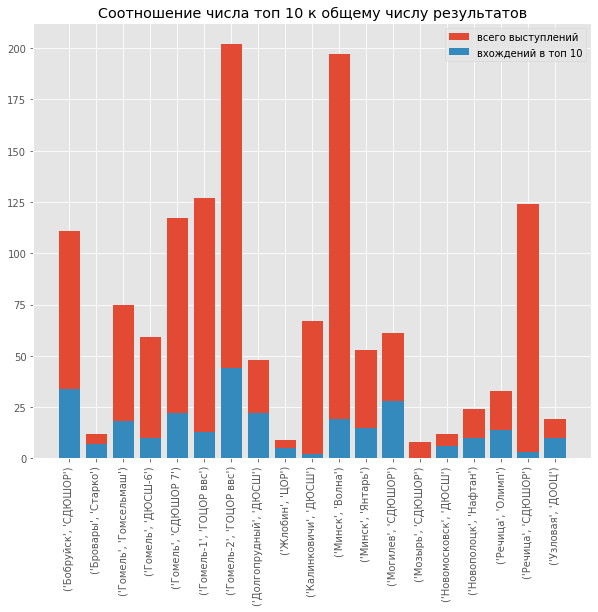

In [36]:
city_stats_places = dict(competitions_df.query('place<=10').groupby(['city','team']).size())
city_stats_athletes = dict(competitions_df.groupby(['city','team']).size())

plt.figure(figsize=(10,8))
plt.bar([str(st) for st in city_stats_athletes.keys()], city_stats_athletes.values(), label='всего выступлений')
plt.bar([str(st) for st in city_stats_places.keys()], city_stats_places.values(), label='вхождений в топ 10')
plt.xticks(rotation=90)

plt.legend(loc='upper right')
plt.title('Соотношение числа топ 10 к общему числу результатов')
plt.show()

**Еще пару графиков ;)**

In [37]:
# подготовим данные с результатами 4х различных групп на одной дистанции

filter_group_female_2004 = (competitions_df['athlete_group'] == 'Девушки 2004-2005 г.р.')
filter_group_female_2006 = (competitions_df['athlete_group'] == 'Девочки 2006 г.р.')
filter_group_male_2004 = (competitions_df['athlete_group'] == 'Юноши 2004-2005 г.р.')
filter_group_male_2006 = (competitions_df['athlete_group'] == 'Мальчики 2006 г.р.')

filter_style = (competitions_df['style'] == 'комплексное плавание')
filter_distance = (competitions_df['distance'] == 200)

df_female_2004 = competitions_df[filter_group_female_2004 & filter_style & filter_distance].iloc[:100,:] \
             .sort_values(by=['result_s'], ascending=[False])[['place', 'points', 'result_s']]
df_female_2006 = competitions_df[filter_group_female_2006 & filter_style & filter_distance].iloc[:100,:] \
             .sort_values(by=['result_s'], ascending=[False])[['place', 'points', 'result_s']]
df_male_2004 = competitions_df[filter_group_male_2004 & filter_style & filter_distance].iloc[:100,:] \
             .sort_values(by=['result_s'], ascending=[False])[['place', 'points', 'result_s']]
df_male_2006 = competitions_df[filter_group_male_2006 & filter_style & filter_distance].iloc[:100,:] \
             .sort_values(by=['result_s'], ascending=[False])[['place', 'points', 'result_s']]

# competitions_df[filter_group_female_2006 & filter_style & filter_distance]

**График место/время**

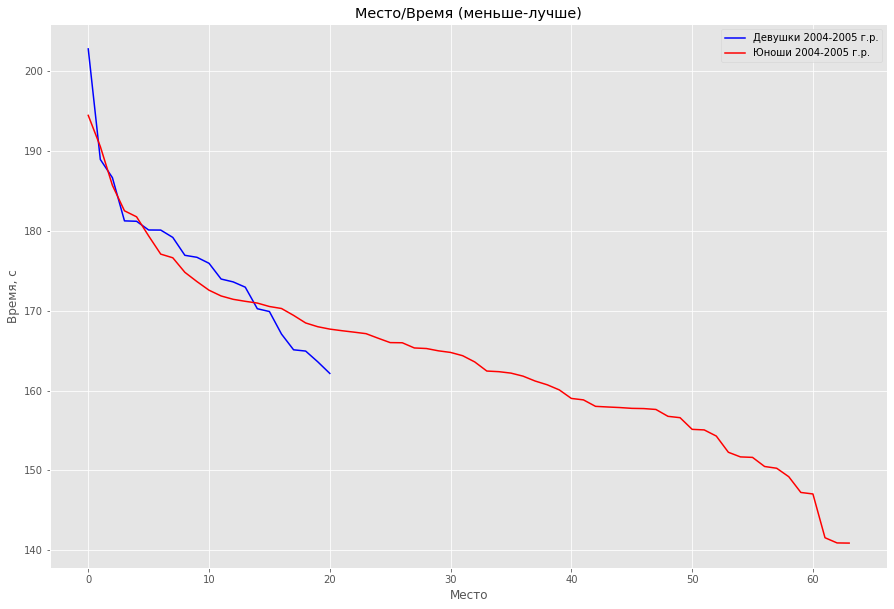

In [38]:
plt.figure(figsize=(15,10))

plt.plot(range(len(df_female_2004)), df_female_2004['result_s'], color='blue', label='Девушки 2004-2005 г.р.')
plt.plot(range(len(df_male_2004)), df_male_2004['result_s'], color='red', label='Юноши 2004-2005 г.р.')
# plt.plot(range(len(df_female_2006)), df_female_2006['result_s'], color='lightblue', label='Девочки 2006 г.р.')
# plt.plot(range(len(df_male_2006)), df_male_2006['result_s'], color='magenta', label='Мальчики 2006 г.р.')

plt.xlabel('Место')
plt.ylabel('Время, с')
plt.legend(loc='upper right')
plt.title('Место/Время (меньше-лучше)')
plt.show()

*Кривые накладываются друг на друга, восприятие данных осложнено*

Попробуем *points* как целевой признак (вместо *result_s*)

**График место/очки:**

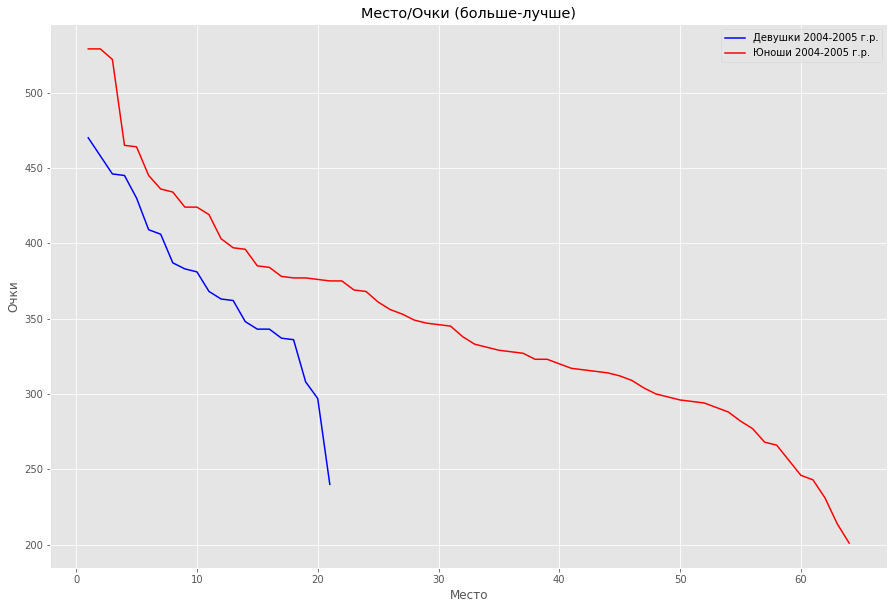

In [39]:
plt.figure(figsize=(15,10))

plt.plot(range(len(df_female_2004), 0, -1), df_female_2004['points'], color='blue', label='Девушки 2004-2005 г.р.')
plt.plot(range(len(df_male_2004), 0, -1), df_male_2004['points'], color='red', label='Юноши 2004-2005 г.р.')
# plt.plot(range(len(df_female_2006), 0, -1), df_female_2006['points'], color='lightblue', label='Девочки 2006 г.р.')
# plt.plot(range(len(df_male_2006), 0, -1), df_male_2006['points'], color='magenta', label='Мальчики 2006 г.р.')

plt.xlabel('Место')
plt.ylabel('Очки')
plt.legend(loc='upper right')
plt.title('Место/Очки (больше-лучше)')
plt.show()

Очевидно, время и очки коррелируют друг с другом. 

Вместе с тем, очки - лучший выбор для целевого признака когда мы сравниваем мальчиков и девочек

Кривые четко отделены друг от друга. 

In [40]:
# Сохраним очищенные данные в csv

competitions_df.to_csv('Competitions_results_cleaned.csv', index=None)
disc_df.to_csv('Competitions_disc_cleaned.csv', index=None)